# Iris detection model

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,Dense,Dropout
from tensorflow.keras import layers

In [2]:
print(tf.__version__)

2.15.0


## create a dataset

In [3]:
# create a dataset

batch_size=32
img_height=180
img_width=180

path_train = "Dataset/train/"
train_image_dataset = tf.keras.utils.image_dataset_from_directory(
    path_train,
    batch_size=batch_size,
    image_size=(img_height,img_width),
    validation_split=0.2,
    subset="training",
    seed=123,
)

path_validate = "Dataset/test/"
validate_image_dataset = tf.keras.utils.image_dataset_from_directory(
    path_validate,
    batch_size=batch_size,
    image_size=(img_height,img_width),
    validation_split=0.2,
    subset="validation",
    seed=123,
    
)

class_names = train_image_dataset.class_names
class_name = {}
for i in range(len(class_names)):
    class_name[i + 1] = class_names[i]

print(class_names)
print(class_name)

Found 310 files belonging to 3 classes.
Using 248 files for training.
Found 111 files belonging to 3 classes.
Using 22 files for validation.
['iris_setosa', 'iris_versicolour', 'iris_virginica']
{1: 'iris_setosa', 2: 'iris_versicolour', 3: 'iris_virginica'}


##  Visualize the data

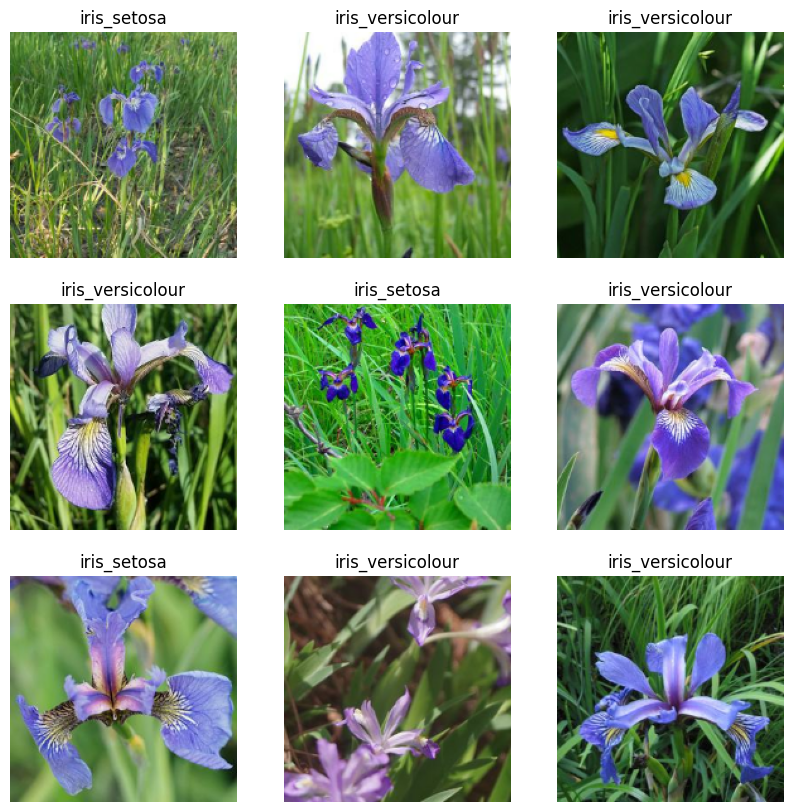

In [4]:
# Visualize the data

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
count = 0  # Initialize a count to keep track of how many images have been plotted

for images, labels in train_image_dataset:
    for i in range(len(images)):  # Iterate over all available images in the batch
        if count >= 9:
            break  # Exit the loop if you've plotted 9 images
        ax = plt.subplot(3, 3, count + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        count += 1
    if count >= 9:
        break  # Exit the outer loop if you've plotted 9 images

plt.show()


In [5]:
for image_batch , labels_batch in train_image_dataset:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


##  creating CNN model

In [6]:
# creating model

num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

##  compile the model

In [7]:
# compile the model

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

##  Train the model

In [9]:
# Train teh model

epochs=30
history = model.fit(
    train_image_dataset,
    validation_data=validate_image_dataset,
    epochs=epochs
)

Epoch 1/30


8/8 [==============================] - 6s 296ms/step - loss: 1.6136 - accuracy: 0.4516 - val_loss: 0.9584 - val_accuracy: 0.6364
Epoch 2/30
8/8 [==============================] - 2s 215ms/step - loss: 0.9121 - accuracy: 0.6210 - val_loss: 0.8187 - val_accuracy: 0.6364
Epoch 3/30
8/8 [==============================] - 2s 215ms/step - loss: 0.8775 - accuracy: 0.6210 - val_loss: 0.8300 - val_accuracy: 0.6364
Epoch 4/30
8/8 [==============================] - 2s 217ms/step - loss: 0.8345 - accuracy: 0.6290 - val_loss: 0.9897 - val_accuracy: 0.6364
Epoch 5/30
8/8 [==============================] - 2s 214ms/step - loss: 0.7824 - accuracy: 0.6331 - val_loss: 0.8226 - val_accuracy: 0.6364
Epoch 6/30
8/8 [==============================] - 2s 214ms/step - loss: 0.6458 - accuracy: 0.7339 - val_loss: 0.9649 - val_accuracy: 0.6364
Epoch 7/30
8/8 [==============================] - 2s 214ms/step - loss: 0.5542 - accuracy: 0.8065 - val_loss: 1.1520 - val_accuracy: 0.6364
Epoch 8/30
8/8 [==

##  Predict the new data

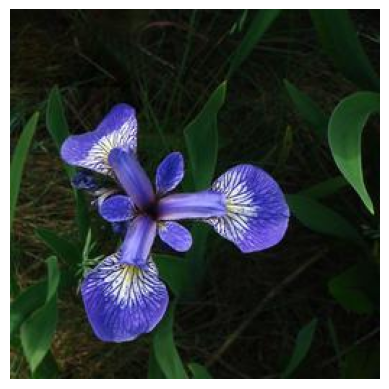

In [16]:
path = "Dataset/train/iris_versicolour/iris-02868b71ddd9b33ab795ac41609ea7b20a6e94f2543fad5d7fa11241d61feacf.jpg"

img = imread(path)
plt.imshow(img)
plt.axis('off')
plt.show()


In [17]:
# predict the output

# path = "Cat_Dog/test/cats/cat_1.jpg"

img = image.load_img(path,target_size=(img_height,img_width))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
# img = preprocess_input(img)



prediction = model.predict(img)

predicted_class = np.argmax(prediction)

print(f"Predicted class : {predicted_class}")
print(f"Predict animal : {class_names[predicted_class]}")

1/1 [==============================] - 0s 46ms/step
Predicted class : 1
Predict animal : iris_versicolour


In [13]:
# Define the path where you want to save the model

model.save('Iris_Model.h5')


C:\Users\abhis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
